In [2]:
######不进行采样，全部数据，5种模型#######
######不做其余处理，cut=10#########
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("train10.csv",index_col=None)
df = df.drop(columns=["depmap_id","drugname1","drugname2","drug1","drug2","cell line","score","cut4","drug_combination","cancer"])

X = df.drop(columns=["seneitive10"])
y = df["seneitive10"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)


#数据分割与建模#
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier
from sklearn.svm import SVC
from joblib import parallel_backend

print('随机分类情况：{}'.format(Counter(y)))
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=22)

随机分类情况：Counter({0: 124870, 1: 3575})


logistic

In [3]:
from joblib import parallel_backend
#Logistic#
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

class_weight = {0: len(y_train) / len(y_train[y_train==0]), 1: 1.0}
logreg = LogisticRegression(class_weight=class_weight)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
logreg = LogisticRegression(**best_params)
logreg.fit(X_train, y_train.astype('int'))

LRpredictions = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LRpredictions))
print("Precision:",precision_score(y_test,LRpredictions))
print("Recall:",recall_score(y_test,LRpredictions))
print("F1 Score:",f1_score(y_test,LRpredictions))
print("混淆矩阵:",confusion_matrix(y_test,LRpredictions))

y_score = logreg.fit(X_train,y_train).predict_proba(X_test)
LR_fpr,LR_tpr,thresholds=roc_curve(y_test, y_score[:,1])
LR_auc =auc(LR_fpr,LR_tpr)
print("Logistic Regression AUC:",LR_auc)
plt.plot(LR_fpr,LR_tpr)
plt.title("Logistic Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LR_precision, LR_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
LR_aupr = auc(LR_recall, LR_precision)
print("Logistic Regression AUPR:", LR_aupr)
plt.plot(LR_recall, LR_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [3]:
import joblib
joblib.dump(logreg, "models/logistic4.pkl")
# 调用模型
# logreg = joblib.load("/models/logistic1.pkl")
# print(logreg)

['models/logistic4.pkl']

Accuracy: 0.9724006384055432
Precision: 0.5681818181818182
Recall: 0.03496503496503497
F1 Score: 0.06587615283267456
混淆矩阵: [[24955    19]
 [  690    25]]
Logistic Regression AUC: 0.8455538375294922


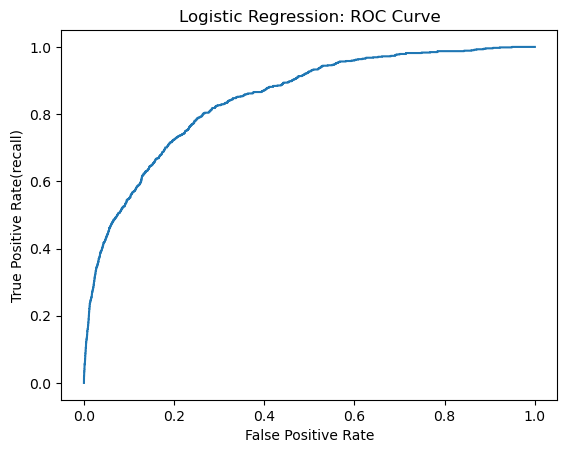

Logistic Regression AUPR: 0.21321589052642614


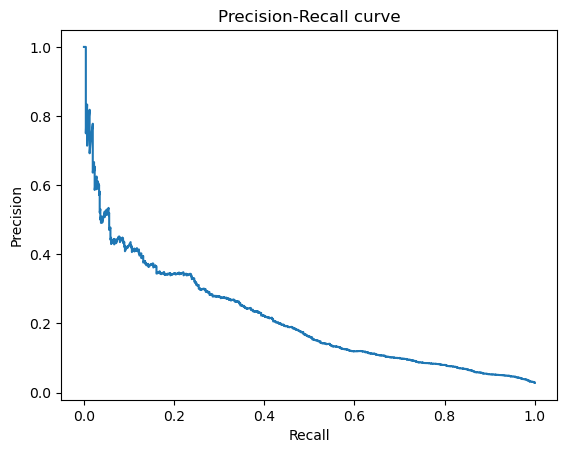

In [3]:
import joblib
logreg = joblib.load('models/logistic4.pkl')
LRpredictions = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LRpredictions))
print("Precision:",precision_score(y_test,LRpredictions))
print("Recall:",recall_score(y_test,LRpredictions))
print("F1 Score:",f1_score(y_test,LRpredictions))
print("混淆矩阵:",confusion_matrix(y_test,LRpredictions))

y_score = logreg.fit(X_train,y_train).predict_proba(X_test)
LR_fpr,LR_tpr,thresholds=roc_curve(y_test, y_score[:,1])
LR_auc =auc(LR_fpr,LR_tpr)
print("Logistic Regression AUC:",LR_auc)
plt.plot(LR_fpr,LR_tpr)
plt.title("Logistic Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LR_precision, LR_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
LR_aupr = auc(LR_recall, LR_precision)
print("Logistic Regression AUPR:", LR_aupr)
plt.plot(LR_recall, LR_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

lasso

Best accuracy: 0.9722546614230652
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9724784927400834
Precision: 0.5909090909090909
Recall: 0.03636363636363636
F1 Score: 0.06851119894598155
混淆矩阵: [[24956    18]
 [  689    26]]
Lasso Regression AUC: 0.8433522751773733


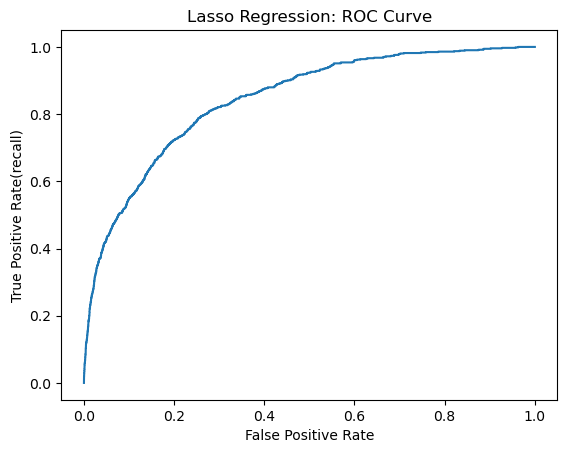

Lasso AUPR: 0.20786525462143807


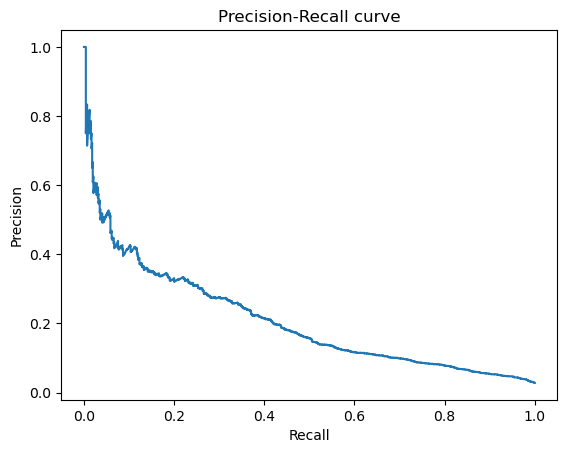

In [5]:
from joblib import parallel_backend
#lasso#
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1'],
    'solver': ['liblinear']
}
class_weight = {0: len(y_train) / len(y_train[y_train==0]), 1: 1.0}

lasso = LogisticRegression(class_weight=class_weight)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
lasso = LogisticRegression(**best_params)
lasso.fit(X_train, y_train.astype('int'))

LApredictions = lasso.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LApredictions))
print("Precision:",precision_score(y_test,LApredictions))
print("Recall:",recall_score(y_test,LApredictions))
print("F1 Score:",f1_score(y_test,LApredictions))
print("混淆矩阵:",confusion_matrix(y_test,LApredictions))

y_score = lasso.fit(X_train,y_train).predict_proba(X_test)
LA_fpr,LA_tpr,LA_thresholds=roc_curve(y_test, y_score[:,1])
LA_auc =auc(LA_fpr,LA_tpr)
print("Lasso Regression AUC:",LA_auc)
plt.plot(LA_fpr,LA_tpr)
plt.title("Lasso Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LA_precision, LA_recall, LA_thresholds = precision_recall_curve(y_test, y_score[:,1])
LA_aupr = auc(LA_recall, LA_precision)
print("Lasso AUPR:", LA_aupr)
plt.plot(LA_recall, LA_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [6]:
import joblib
joblib.dump(lasso, "models/lasso4.pkl")

['models/lasso4.pkl']

Accuracy: 0.9723617112382732
Precision: 0.5581395348837209
Recall: 0.033566433566433566
F1 Score: 0.0633245382585752
混淆矩阵: [[24955    19]
 [  691    24]]
Lasso Regression AUC: 0.844100185871628


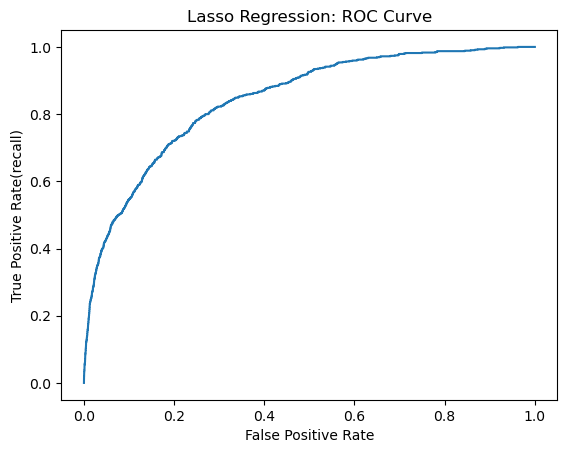

Lasso AUPR: 0.21131072924331032


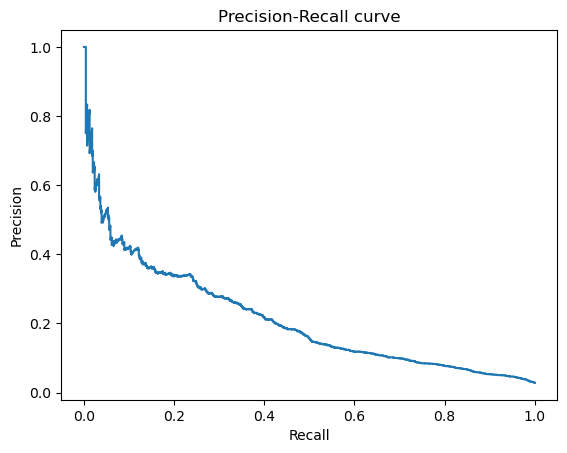

In [4]:
lasso = joblib.load('models/lasso4.pkl')
LApredictions = lasso.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LApredictions))
print("Precision:",precision_score(y_test,LApredictions))
print("Recall:",recall_score(y_test,LApredictions))
print("F1 Score:",f1_score(y_test,LApredictions))
print("混淆矩阵:",confusion_matrix(y_test,LApredictions))

y_score = lasso.fit(X_train,y_train).predict_proba(X_test)
LA_fpr,LA_tpr,LA_thresholds=roc_curve(y_test, y_score[:,1])
LA_auc =auc(LA_fpr,LA_tpr)
print("Lasso Regression AUC:",LA_auc)
plt.plot(LA_fpr,LA_tpr)
plt.title("Lasso Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LA_precision, LA_recall, LA_thresholds = precision_recall_curve(y_test, y_score[:,1])
LA_aupr = auc(LA_recall, LA_precision)
print("Lasso AUPR:", LA_aupr)
plt.plot(LA_recall, LA_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

RF

Best accuracy: 0.9733640851224514
Best parameters: {'max_depth': 9, 'n_estimators': 10}
Accuracy: 0.9733738175872941
Precision: 0.7384615384615385
Recall: 0.06713286713286713
F1 Score: 0.12307692307692308
混淆矩阵: [[24957    17]
 [  667    48]]
Random Forest AUC: 0.8617064964346137


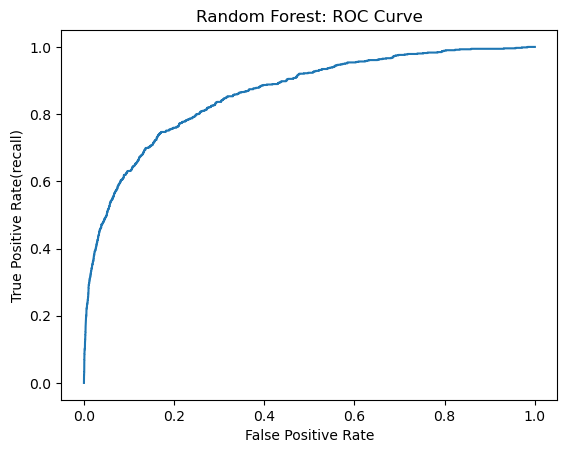

Random Forest AUPR: 0.29291962058870147


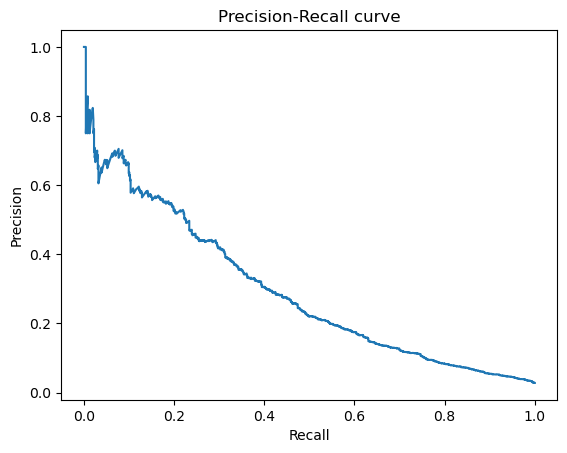

In [2]:

param_grid = {
    'n_estimators': [10,20,30,50,70,100],
    'max_depth': [5,7,9],
}
class_weight = {0: len(y_train) / len(y_train[y_train==0]), 1: 1.0}
rfc = RandomForestClassifier(class_weight=class_weight)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #不平衡处理
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train.astype('int'))

RFpredictions = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,RFpredictions))
print("Precision:",precision_score(y_test,RFpredictions))
print("Recall:",recall_score(y_test,RFpredictions))
print("F1 Score:",f1_score(y_test,RFpredictions))
print("混淆矩阵:",confusion_matrix(y_test,RFpredictions))

y_score = rfc.fit(X_train,y_train).predict_proba(X_test)
RF_fpr,RF_tpr,RF_thresholds=roc_curve(y_test, y_score[:,1])
RF_auc =auc(RF_fpr,RF_tpr)
print("Random Forest AUC:",RF_auc)
plt.plot(RF_fpr,RF_tpr)
plt.title("Random Forest: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test, y_score[:,1])
RF_aupr = auc(RF_recall, RF_precision)
print("Random Forest AUPR:", RF_aupr)
plt.plot(RF_recall, RF_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [3]:
import joblib
joblib.dump(rfc, "models/rfc4.pkl")

['models/rfc4.pkl']

Accuracy: 0.9722838569037331
Precision: 0.8
Recall: 0.005594405594405594
F1 Score: 0.01111111111111111
混淆矩阵: [[24973     1]
 [  711     4]]
Random Forest AUC: 0.8543125969889805


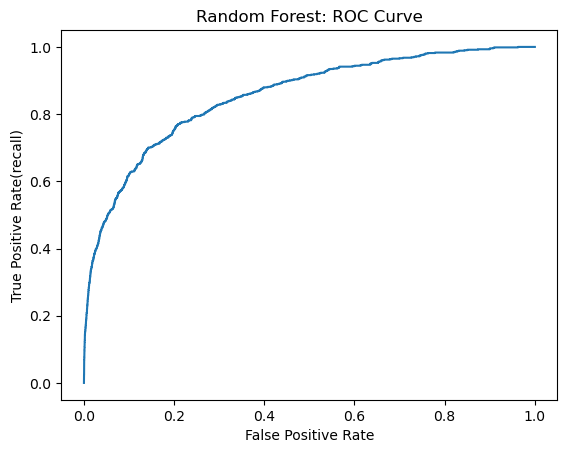

Random Forest AUPR: 0.29621160092901794


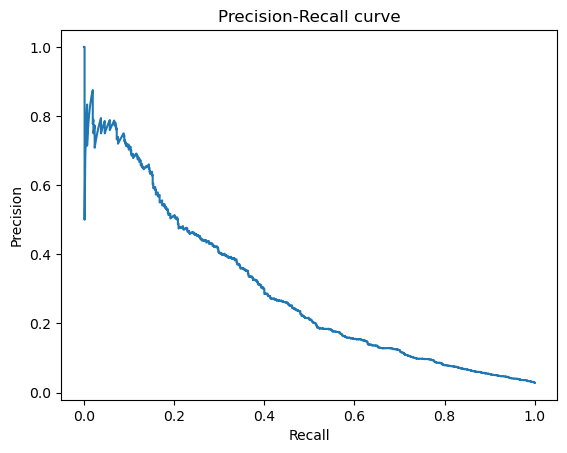

In [5]:
rfc = joblib.load('models/rfc4.pkl')
RFpredictions = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,RFpredictions))
print("Precision:",precision_score(y_test,RFpredictions))
print("Recall:",recall_score(y_test,RFpredictions))
print("F1 Score:",f1_score(y_test,RFpredictions))
print("混淆矩阵:",confusion_matrix(y_test,RFpredictions))

y_score = rfc.fit(X_train,y_train).predict_proba(X_test)
RF_fpr,RF_tpr,RF_thresholds=roc_curve(y_test, y_score[:,1])
RF_auc =auc(RF_fpr,RF_tpr)
print("Random Forest AUC:",RF_auc)
plt.plot(RF_fpr,RF_tpr)
plt.title("Random Forest: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test, y_score[:,1])
RF_aupr = auc(RF_recall, RF_precision)
print("Random Forest AUPR:", RF_aupr)
plt.plot(RF_recall, RF_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

svm

Accuracy: 0.972167075401923
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
混淆矩阵: [[24974     0]
 [  715     0]]


/boot2/chenjiaqi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM AUC: 0.8554306268729267


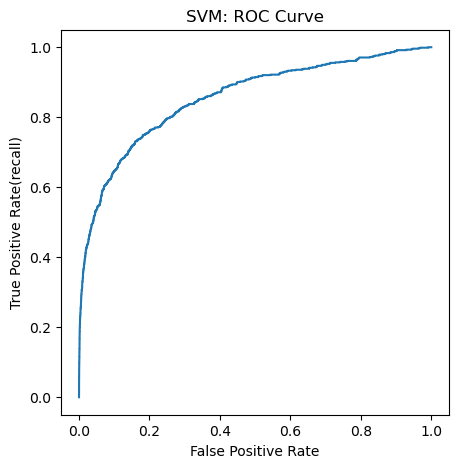

SVM AUPR: 0.36646853876798663


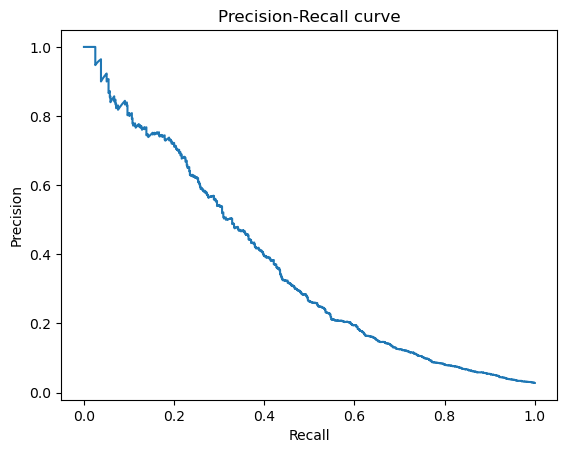

In [11]:
param_grid = {
    'C': [1,5,10],
    'kernel': ['poly','rbf'],
    'gamma': ['scale', 'auto']
}
class_weight = {0: len(y_train) / len(y_train[y_train==0]), 1: 1.0}


svm = SVC(class_weight=class_weight)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
svm = SVC(**best_params)
svm.fit(X_train, y_train.astype('int'))
SVMpredictions = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test,SVMpredictions))
print("Precision:",precision_score(y_test,SVMpredictions))
print("Recall:",recall_score(y_test,SVMpredictions))
print("F1 Score:",f1_score(y_test,SVMpredictions))
print("混淆矩阵:",confusion_matrix(y_test,SVMpredictions))

y_score = svm.fit(X_train,y_train).decision_function(X_test)
plt.figure(figsize=(5,5))
SVM_fpr,SVM_tpr,SVM_thresholds=roc_curve(y_test, y_score)
SVM_auc =auc(SVM_fpr,SVM_tpr)
print("SVM AUC:",SVM_auc)
plt.plot(SVM_fpr,SVM_tpr)
plt.title("SVM: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

SVM_precision, SVM_recall, SVM_thresholds = precision_recall_curve(y_test, y_score)
SVM_aupr = auc(SVM_recall, SVM_precision)
print("SVM AUPR:", SVM_aupr)
plt.plot(SVM_recall, SVM_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [12]:
import joblib
joblib.dump(svm, "models/svm4.pkl")

['models/svm4.pkl']

xgboost

Best accuracy: 0.9760305940926539
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500}
Accuracy: 0.975320175950796
Precision: 0.6653061224489796
Recall: 0.22797202797202798
F1 Score: 0.33958333333333335
混淆矩阵: [[24892    82]
 [  552   163]]
XGbooost_auc: 0.90932925487262


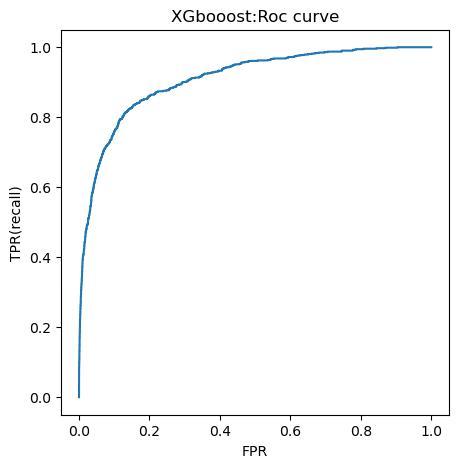

XGboost AUPR: 0.42369687184986426


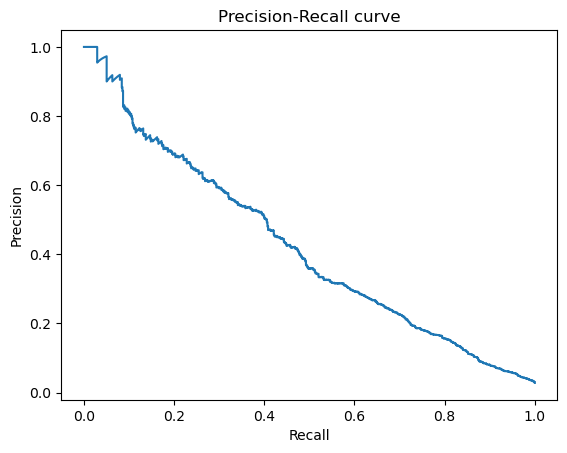

In [3]:
param_grid = {
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [3,5,7],
    'n_estimators': [300,500,700]
}
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train.astype('int'))
XBpredictions = xgb.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [4]:
import joblib
joblib.dump(xgb, "models/xgboost4.pkl")

['models/xgboost4.pkl']

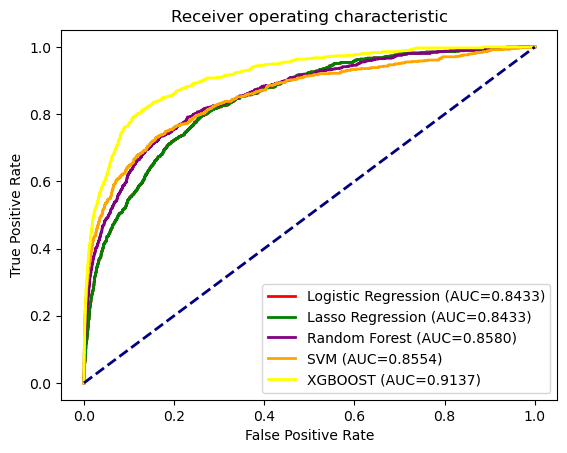

In [15]:
plt.plot(LR_fpr, LR_tpr, color='red', lw=2, label='Logistic Regression (AUC=%0.4f)' % LR_auc)
plt.plot(LA_fpr, LA_tpr, color='green', lw=2, label='Lasso Regression (AUC=%0.4f)' % LA_auc)
plt.plot(RF_fpr, RF_tpr, color='purple', lw=2, label='Random Forest (AUC=%0.4f)' % RF_auc)
plt.plot(SVM_fpr, SVM_tpr, color='orange', lw=2, label='SVM (AUC=%0.4f)' % SVM_auc)
plt.plot(XB_fpr, XB_tpr, color='yellow', lw=2, label='XGBOOST (AUC=%0.4f)' % XB_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

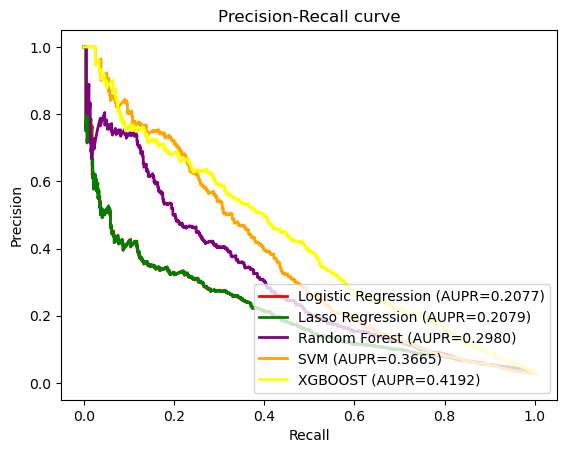

In [16]:
plt.plot(LR_recall, LR_precision, color='red', lw=2, label='Logistic Regression (AUPR=%0.4f)' % LR_aupr)
plt.plot(LA_recall, LA_precision, color='green', lw=2, label='Lasso Regression (AUPR=%0.4f)' % LA_aupr)
plt.plot(RF_recall, RF_precision, color='purple', lw=2, label='Random Forest (AUPR=%0.4f)' % RF_aupr)
plt.plot(SVM_recall, SVM_precision, color='orange', lw=2, label='SVM (AUPR=%0.4f)' % SVM_aupr)
plt.plot(XB_recall, XB_precision, color='yellow', lw=2, label='XGBOOST (AUPR=%0.4f)' % XB_aupr)

#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()